In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv', usecols=['housing_median_age','median_income','median_house_value'])

In [3]:
df.sample(5)

,housing_median_age,median_income,median_house_value
5093,43.0,1.7734,107300.0
14927,16.0,6.6143,264100.0
7874,33.0,4.1708,175000.0
17847,23.0,4.3807,226900.0
17658,34.0,5.3922,302900.0


In [4]:
df.describe()

,housing_median_age,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,206855.816909
std,12.585558,1.899822,115395.615874
min,1.000000,0.499900,14999.000000
25%,18.000000,2.563400,119600.000000
50%,29.000000,3.534800,179700.000000
75%,37.000000,4.743250,264725.000000
max,52.000000,15.000100,500001.000000


C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

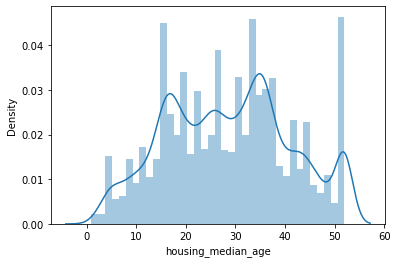

In [5]:
sns.distplot(df['housing_median_age'])

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

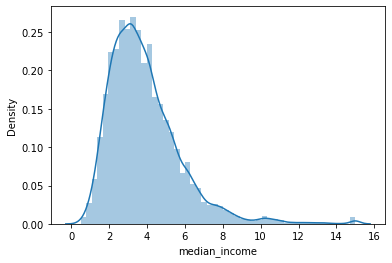

In [6]:
sns.distplot(df['median_income'])

In [7]:
X = df[['housing_median_age','median_income']]
y = df['median_house_value']

In [8]:
X

,housing_median_age,median_income
0,41.0,8.3252
1,21.0,8.3014
2,52.0,7.2574
3,52.0,5.6431
4,52.0,3.8462
...,...,...
20635,25.0,1.5603
20636,18.0,2.5568
20637,17.0,1.7000
20638,18.0,1.8672


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

X_train.shape, X_test.shape

((14448, 2), (6192, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train.describe(), 1)

,housing_median_age,median_income
count,14448.0,14448.0
mean,28.6,3.9
std,12.6,1.9
min,1.0,0.5
25%,18.0,2.6
50%,29.0,3.5
75%,37.0,4.8
max,52.0,15.0


In [14]:
np.round(X_train_scaled.describe(), 1)

,housing_median_age,median_income
count,14448.0,14448.0
mean,0.5,0.2
std,0.2,0.1
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.3
max,1.0,1.0


# Effect of Normalization

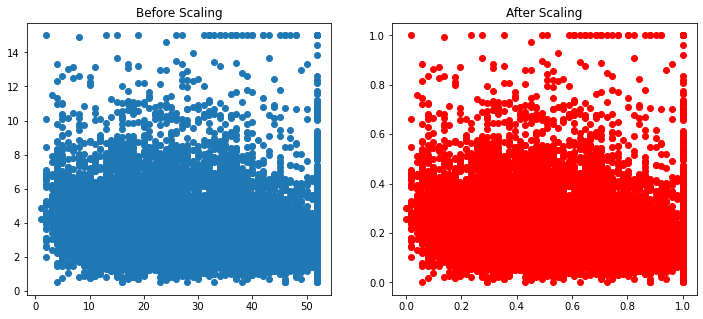

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['housing_median_age'], X_train['median_income'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['housing_median_age'], X_train_scaled['median_income'],color='red')
ax2.set_title("After Scaling")

plt.show()

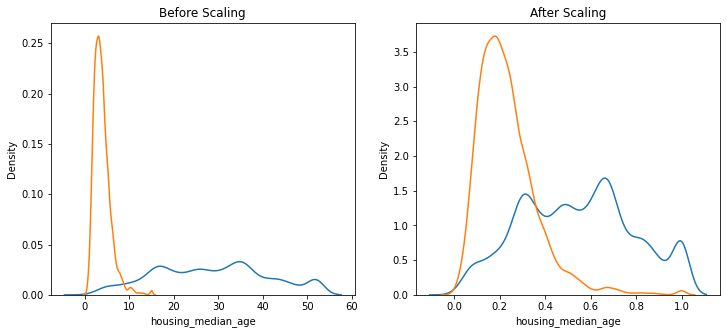

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['housing_median_age'], ax=ax1)
sns.kdeplot(X_train['median_income'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['housing_median_age'], ax=ax2)
sns.kdeplot(X_train_scaled['median_income'], ax=ax2)

plt.show()

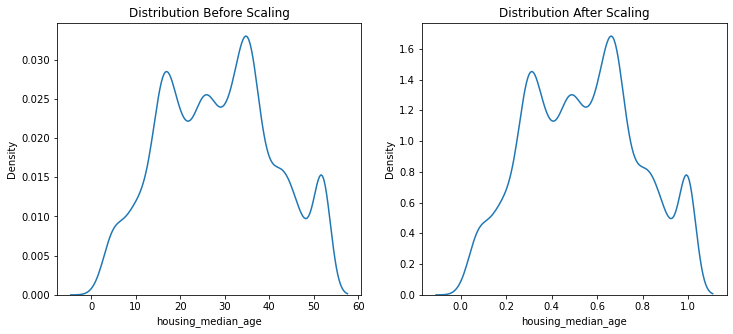

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Distribution Before Scaling')
sns.kdeplot(X_train['housing_median_age'], ax=ax1)

# after scaling
ax2.set_title('Distribution After Scaling')
sns.kdeplot(X_train_scaled['housing_median_age'], ax=ax2)

plt.show()

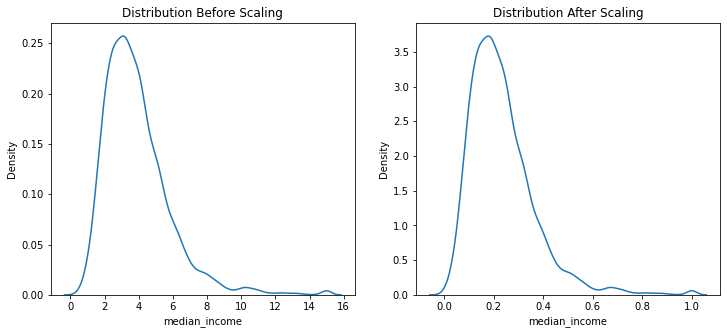

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Distribution Before Scaling')
sns.kdeplot(X_train['median_income'], ax=ax1)

# after scaling
ax2.set_title('Distribution After Scaling')
sns.kdeplot(X_train_scaled['median_income'], ax=ax2)
plt.show()